In [1]:
import os
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import sys
from matplotlib import animation, rc
from IPython.display import HTML, Image

src_dir = os.path.abspath("/home/mmfarrugia/repos/optimization/hybrid_optimizer")
sys.path.append(src_dir)

from hybrid_optimizer import PSO_GA
from plotters import plot_cost_history, plot_contour, plot_surface, plot_summary, Mesher, Designer
import example_funcs

Himmelblau's  objective function

    Only takes two dimensions and has a four equal global minimums
     of zero at :code:`f([3.0,2.0])`, :code:`f([-2.805118,3.131312])`,
     :code:`f([-3.779310,-3.283186])`, and :code:`f([3.584428,-1.848126])`.
    Its coordinates are bounded within :code:`[-5,5]`.

    Best visualized with the full domain and a range of :code:`[0,1000]`

In [ ]:
import copy
n_dim = 2
lb = [-5., -5.]
ub = [5., 5.]
size_pop = 50
common_start = np.random.uniform(low=lb, high=ub, size=(size_pop, n_dim))

random_config = {
    "n_dim": 2,
    "lb": lb,
    "ub": ub,
    "size_pop": size_pop,
    "vectorize_func": False,
    "taper_GA": True,
    "taper_mutation": True,
    "max_iter": 200,
    "initial_guesses":common_start,
    "guess_deviation":0,
    "guess_ratio":1.0,
    "mutation_strategy": 'DE/rand/1'
}
best_config = copy.deepcopy(random_config)
best_config['mutation_strategy'] = 'DE/best/1'

In [ ]:
from plotters import plot_cost_history, plot_contour, plot_surface, Mesher, Designer
#Plot the sphere function's mesh for better plots
m = Mesher(func=example_funcs.himmelblau, limits=[(-5,5), (-5,5)])
#Adjust figure limits
d = Designer(limits=[(-5,5), (-5,5), (0,1000)], label=['x-axis', 'y-axis', 'z-axis'])

In [ ]:
opts = []
opts.append(PSO_GA(example_funcs.himmelblau, n_dim=2, config=random_config))
ho = opts[0]
ho.record_mode = True
ho.run()

print('best_x is ', ho.gbest_x, 'best_y is', ho.gbest_y)

best_x is  [ 1.26221020e-05 -9.04945843e-06] best_y is [2.86304427e-10]


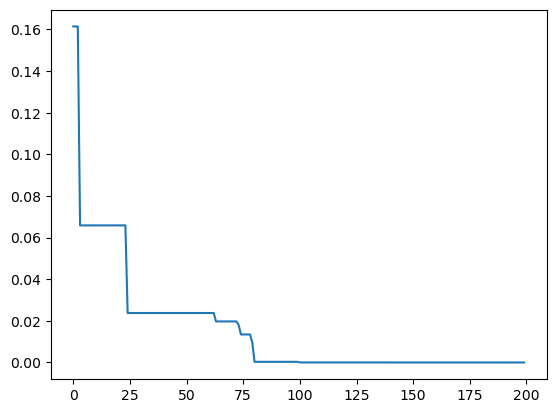

In [ ]:
plt.plot(ho.gbest_y_hist)
plt.show()

In [ ]:
opts.append(PSO_GA(example_funcs.himmelblau, n_dim=2, config=best_config))
ho = opts[1]
ho.record_mode = True
ho.run()

print('best_x is ', ho.gbest_x, 'best_y is', ho.gbest_y)

best_x is  [-3.38565035e-07  1.21108946e-06] best_y is [1.2859577e-12]


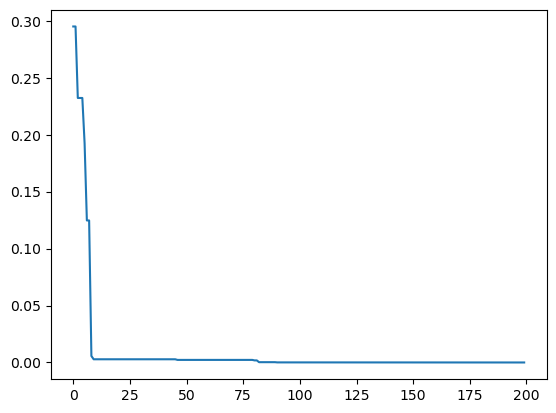

In [ ]:
plt.plot(ho.gbest_y_hist)
plt.show()

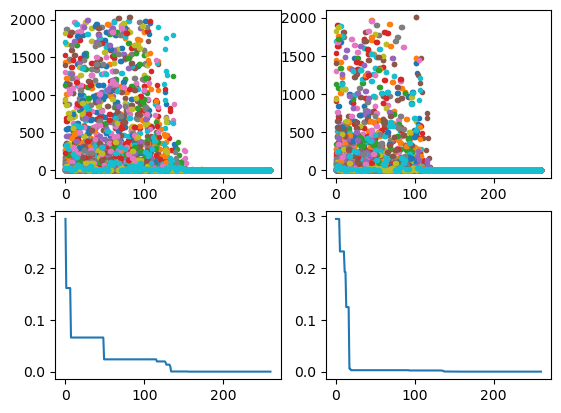

In [ ]:
import pandas as pd

Y_history = []
fig, ax = plt.subplots(2, len(opts))
for i, opt in enumerate(opts):
    Y_history = pd.DataFrame(np.array(opt.record_value['Y']).reshape((-1, opt.size_pop)))
    ax[0,i].plot(Y_history.index, Y_history.values, '.')
    Y_history.min(axis=1).cummin().plot(kind='line', ax=ax[1,i])
plt.show()

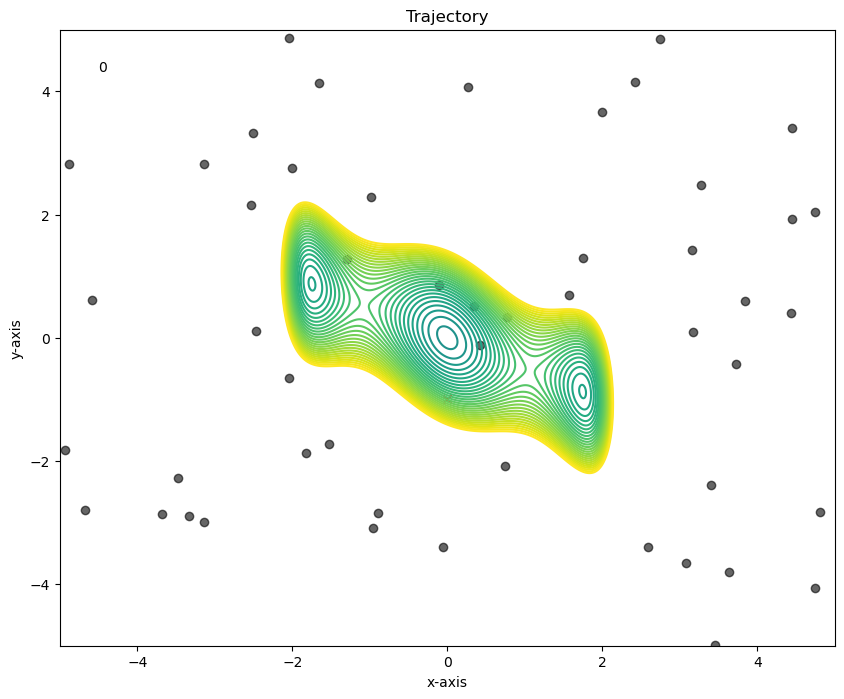

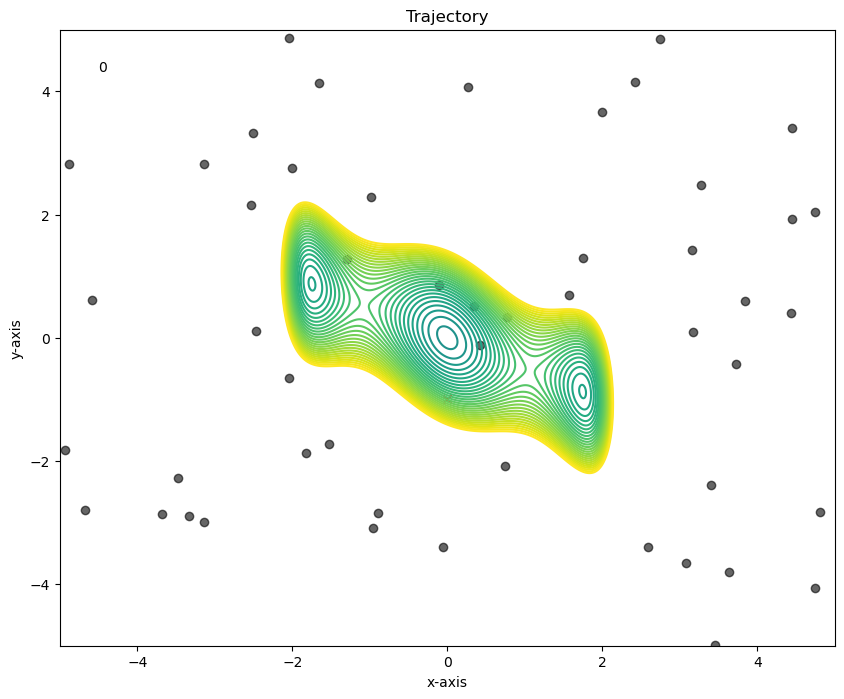

In [ ]:
for i, opt in enumerate(opts):
    animation2D = plot_contour(pos_history=ho.record_value['X'], mesher=m, designer=d, mark=(0, -1, 0))
    animation2D.save('himmelblau_'+str(i)+'.gif', writer='ffmpeg', fps=20)

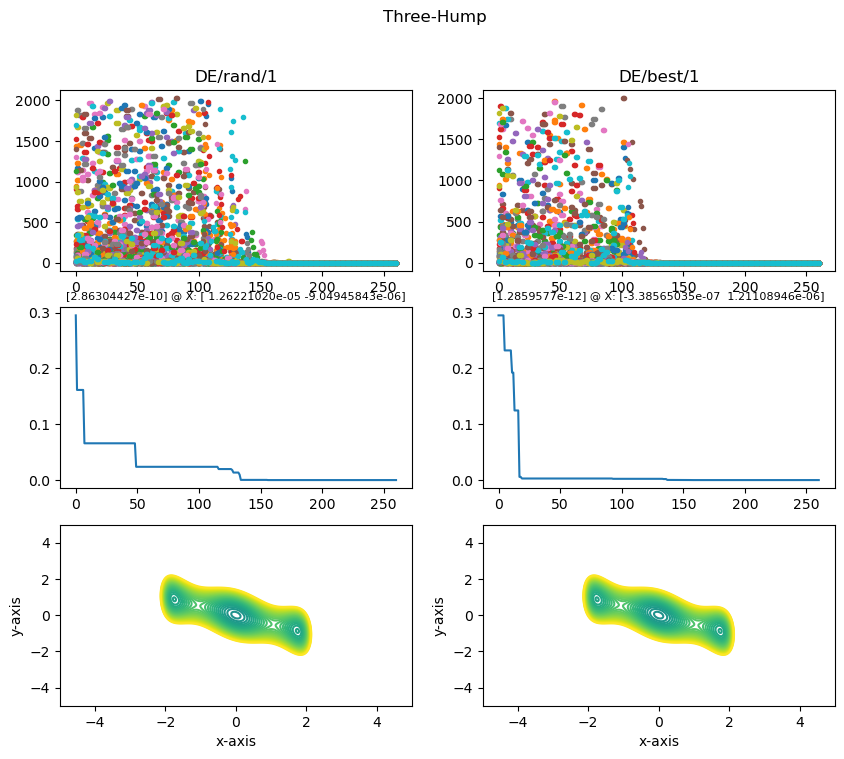

In [ ]:
ani_summary = plot_summary(optimizers=opts, title="Himmelblau", titles=[opt.mutation_strategy for opt in opts], mesher=m, designer=d)
plt.show()


In [ ]:
ani_summary.save('himmelblau_summary.gif', writer='ffmpeg', fps=15)
Image(url='himmelblau_summary.gif')

In [ ]:
pos_history_3d = m.compute_history_3d(opts[0].record_value['X']) #preprocessing
print(str(pos_history_3d))

[[[ 3.27672078e+00  2.47801040e+00  1.20982443e+02]
  [ 3.40197272e+00 -2.38816359e+00  1.38449497e+02]
  [-1.04608385e-01  8.63222089e-01  6.76612418e-01]
  ...
  [-3.13326440e+00  2.82407874e+00  7.52619881e+01]
  [ 4.44700086e+00  1.93155417e+00  9.30232448e+02]
  [ 2.00109659e+00  3.65983718e+00  2.25918009e+01]]

 [[ 1.44901505e+00 -3.26987609e+00  7.06706280e+00]
  [-4.51809097e+00  2.10349496e+00  1.01589703e+03]
  [-2.07752097e+00 -3.04252997e+00  1.80505075e+01]
  ...
  [ 2.21882907e+00 -3.03351123e+00  6.75596699e+00]
  [-2.62426923e+00 -4.63342245e+00  5.20398877e+01]
  [-3.78682841e+00 -4.16595302e+00  3.37367802e+02]]

 [[ 1.44901505e+00 -3.26987609e+00  7.06706280e+00]
  [-4.51809097e+00  2.10349496e+00  1.01589703e+03]
  [-2.07752097e+00 -3.04252997e+00  1.80505075e+01]
  ...
  [ 2.21882907e+00 -3.03351123e+00  6.75596699e+00]
  [-2.62426923e+00 -4.63342245e+00  5.20398877e+01]
  [-3.78682841e+00 -4.16595302e+00  3.37367802e+02]]

 ...

 [[ 1.04958705e-03  1.02495195e-05

In [ ]:
%%capture

animation3d = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d, title="Himmelblau Random")


In [ ]:
animation3d.save('himmelblau_rand_3d.gif', writer='ffmpeg', fps=15)
Image(url='himmelblau_rand_3d.gif')

In [ ]:
pos_history_3d = m.compute_history_3d(opts[1].record_value['X']) #preprocessing
print(str(pos_history_3d))

[[[ 3.27672078e+00  2.47801040e+00  1.20982443e+02]
  [ 3.40197272e+00 -2.38816359e+00  1.38449497e+02]
  [-1.04608385e-01  8.63222089e-01  6.76612418e-01]
  ...
  [-3.13326440e+00  2.82407874e+00  7.52619881e+01]
  [ 4.44700086e+00  1.93155417e+00  9.30232448e+02]
  [ 2.00109659e+00  3.65983718e+00  2.25918009e+01]]

 [[-3.33128637e+00 -4.96844035e+00  1.61902735e+02]
  [-1.33917964e+00  4.49797160e+00  1.53792056e+01]
  [-2.23089437e+00 -3.64142184e+00  2.58752450e+01]
  ...
  [-2.17338707e-01  2.64570474e+00  6.51688650e+00]
  [-2.75931664e+00 -1.54237131e+00  3.45563116e+01]
  [-3.68691179e+00 -4.36641621e-01  2.53594998e+02]]

 [[-3.33128637e+00 -4.96844035e+00  1.61902735e+02]
  [-1.33917964e+00  4.49797160e+00  1.53792056e+01]
  [-2.23089437e+00 -3.64142184e+00  2.58752450e+01]
  ...
  [-2.17338707e-01  2.64570474e+00  6.51688650e+00]
  [-2.75931664e+00 -1.54237131e+00  3.45563116e+01]
  [-3.68691179e+00 -4.36641621e-01  2.53594998e+02]]

 ...

 [[ 4.10531068e-06  2.50736207e-05

In [ ]:
%%capture

animation3d = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d, title="Himmelblau Best")


In [ ]:
animation3d.save('himmelblau_best_3d.gif', writer='ffmpeg', fps=15)
Image(url='himmelblau_best_3d.gif')

Three-Hump Camel  objective function

    Only takes two dimensions and has a global minimum of `0` at
    :code:`f([0, 0])`. Its coordinates are bounded within
    :code:`[-5, 5]`.

    Best visualized in the full domin and a range of :code:`[0, 2000]`.

In [2]:
import copy
n_dim = 2
lb = [-5., -5.]
ub = [5., 5.]
size_pop = 50
common_start = np.random.uniform(low=lb, high=ub, size=(size_pop, n_dim))

random_config = {
    "n_dim": 2,
    "lb": lb,
    "ub": ub,
    "size_pop": size_pop,
    "vectorize_func": False,
    "taper_GA": True,
    "taper_mutation": True,
    "max_iter": 200,
    "initial_guesses":common_start,
    "guess_deviation":0,
    "guess_ratio":1.0,
    "mutation_strategy": 'DE/rand/1'
}
best_config = copy.deepcopy(random_config)
best_config['mutation_strategy'] = 'DE/best/1'

In [3]:
from plotters import plot_cost_history, plot_contour, plot_surface, Mesher, Designer
#Plot the sphere function's mesh for better plots
m = Mesher(func=example_funcs.threehump, limits=[(-5,5), (-5,5)])
#Adjust figure limits
d = Designer(limits=[(-5,5), (-5,5), (0,2000)], label=['x-axis', 'y-axis', 'z-axis'])

In [4]:
opts = []
opts.append(PSO_GA(example_funcs.threehump, n_dim=2, config=random_config))
ho = opts[0]
ho.record_mode = True
ho.run()

print('best_x is ', ho.gbest_x, 'best_y is', ho.gbest_y)

best_x is  [ 1.26221020e-05 -9.04945843e-06] best_y is [2.86304427e-10]


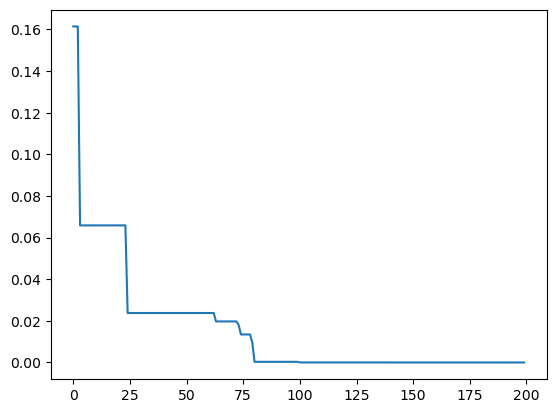

In [5]:
plt.plot(ho.gbest_y_hist)
plt.show()

In [6]:
opts.append(PSO_GA(example_funcs.threehump, n_dim=2, config=best_config))
ho = opts[1]
ho.record_mode = True
ho.run()

print('best_x is ', ho.gbest_x, 'best_y is', ho.gbest_y)

best_x is  [-3.38565035e-07  1.21108946e-06] best_y is [1.2859577e-12]


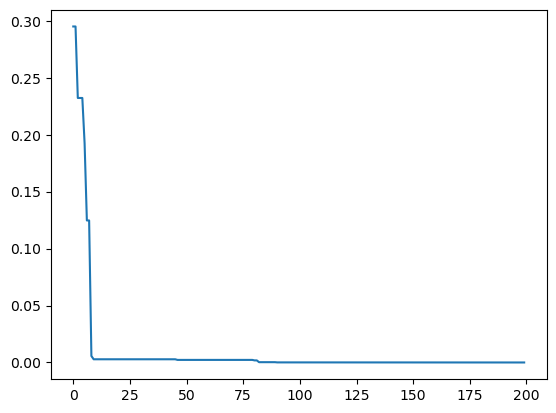

In [7]:
plt.plot(ho.gbest_y_hist)
plt.show()

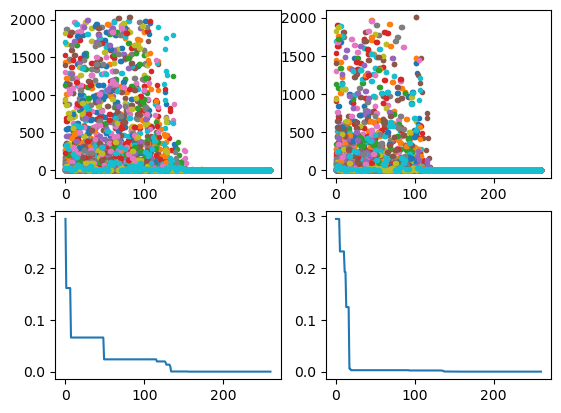

In [8]:
import pandas as pd

Y_history = []
fig, ax = plt.subplots(2, len(opts))
for i, opt in enumerate(opts):
    Y_history = pd.DataFrame(np.array(opt.record_value['Y']).reshape((-1, opt.size_pop)))
    ax[0,i].plot(Y_history.index, Y_history.values, '.')
    Y_history.min(axis=1).cummin().plot(kind='line', ax=ax[1,i])
plt.show()

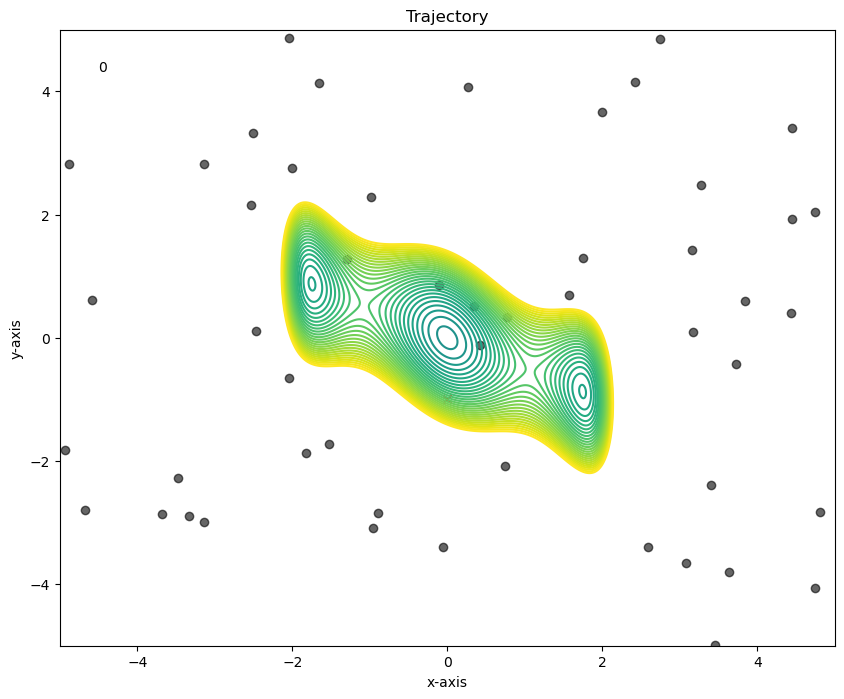

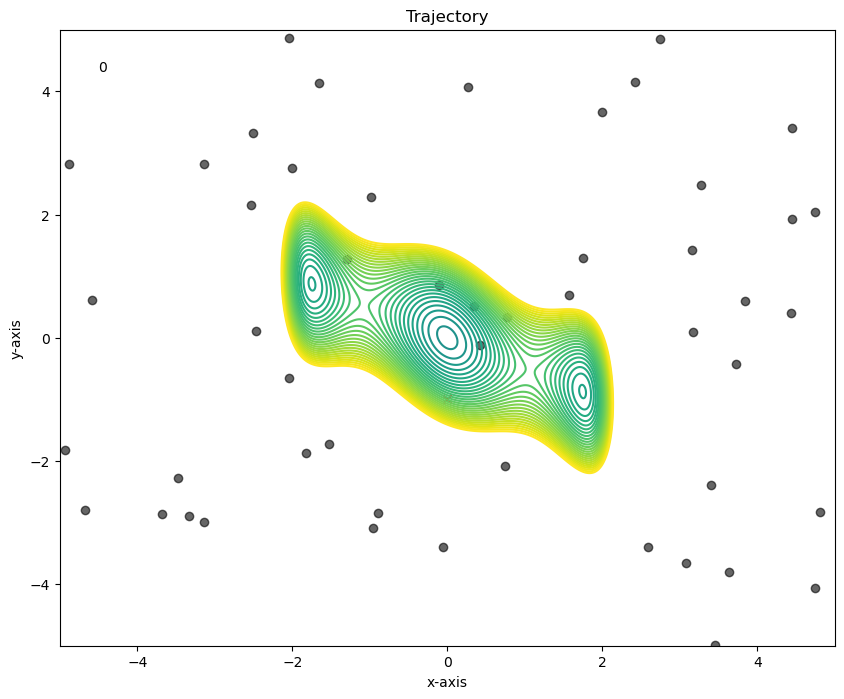

In [9]:
for i, opt in enumerate(opts):
    animation2D = plot_contour(pos_history=ho.record_value['X'], mesher=m, designer=d, mark=(0, -1, 0))
    animation2D.save('threehump_'+str(i)+'.gif', writer='ffmpeg', fps=20)

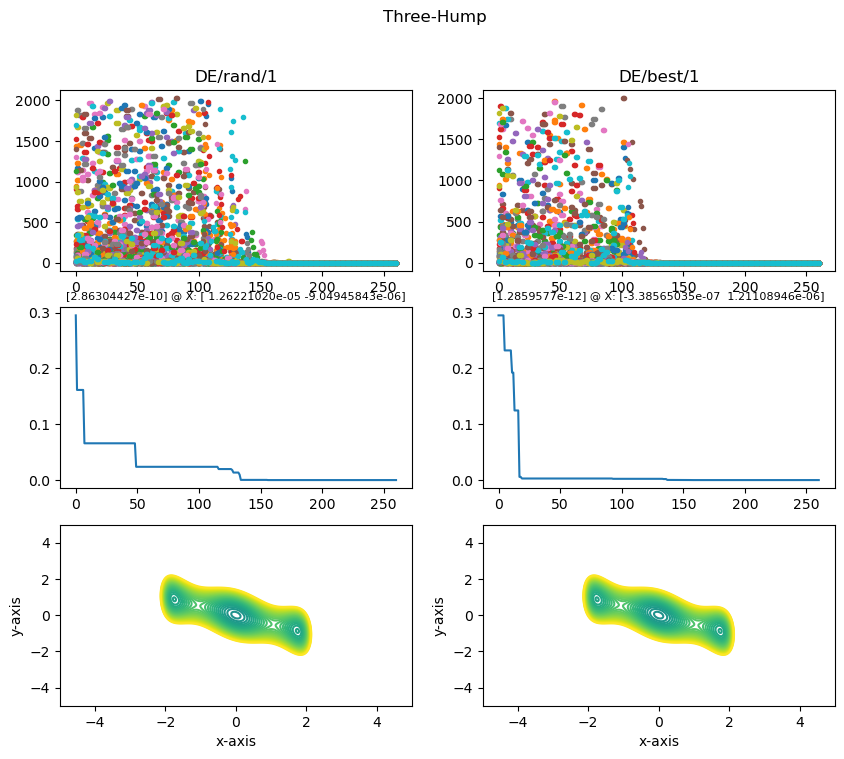

In [10]:
ani_summary = plot_summary(optimizers=opts, title="Three-Hump", titles=[opt.mutation_strategy for opt in opts], mesher=m, designer=d)
plt.show()


In [11]:
ani_summary.save('threehump_summary.gif', writer='ffmpeg', fps=15)
Image(url='threehump_summary.gif')

In [ ]:
%%capture

#Make animation
animation2D = plot_contour(pos_history=ho.record_value['X'], mesher=m, designer=d, mark=(0, 0, 0))

animation2D.save('threehump.gif', writer='ffmpeg', fps=20)

In [ ]:
Image(url='threehump.gif')

In [14]:
pos_history_3d = m.compute_history_3d(opts[0].record_value['X']) #preprocessing
print(str(pos_history_3d))

[[[ 3.27672078e+00  2.47801040e+00  1.20982443e+02]
  [ 3.40197272e+00 -2.38816359e+00  1.38449497e+02]
  [-1.04608385e-01  8.63222089e-01  6.76612418e-01]
  ...
  [-3.13326440e+00  2.82407874e+00  7.52619881e+01]
  [ 4.44700086e+00  1.93155417e+00  9.30232448e+02]
  [ 2.00109659e+00  3.65983718e+00  2.25918009e+01]]

 [[ 1.44901505e+00 -3.26987609e+00  7.06706280e+00]
  [-4.51809097e+00  2.10349496e+00  1.01589703e+03]
  [-2.07752097e+00 -3.04252997e+00  1.80505075e+01]
  ...
  [ 2.21882907e+00 -3.03351123e+00  6.75596699e+00]
  [-2.62426923e+00 -4.63342245e+00  5.20398877e+01]
  [-3.78682841e+00 -4.16595302e+00  3.37367802e+02]]

 [[ 1.44901505e+00 -3.26987609e+00  7.06706280e+00]
  [-4.51809097e+00  2.10349496e+00  1.01589703e+03]
  [-2.07752097e+00 -3.04252997e+00  1.80505075e+01]
  ...
  [ 2.21882907e+00 -3.03351123e+00  6.75596699e+00]
  [-2.62426923e+00 -4.63342245e+00  5.20398877e+01]
  [-3.78682841e+00 -4.16595302e+00  3.37367802e+02]]

 ...

 [[ 1.04958705e-03  1.02495195e-05

In [15]:
%%capture

animation3d = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d, title="Three-Hump Random")


In [ ]:
animation3d.save('threehump_rand_3d.gif', writer='ffmpeg', fps=15)
Image(url='threehump_rand_3d.gif')

In [17]:
pos_history_3d = m.compute_history_3d(opts[1].record_value['X']) #preprocessing
print(str(pos_history_3d))

[[[ 3.27672078e+00  2.47801040e+00  1.20982443e+02]
  [ 3.40197272e+00 -2.38816359e+00  1.38449497e+02]
  [-1.04608385e-01  8.63222089e-01  6.76612418e-01]
  ...
  [-3.13326440e+00  2.82407874e+00  7.52619881e+01]
  [ 4.44700086e+00  1.93155417e+00  9.30232448e+02]
  [ 2.00109659e+00  3.65983718e+00  2.25918009e+01]]

 [[-3.33128637e+00 -4.96844035e+00  1.61902735e+02]
  [-1.33917964e+00  4.49797160e+00  1.53792056e+01]
  [-2.23089437e+00 -3.64142184e+00  2.58752450e+01]
  ...
  [-2.17338707e-01  2.64570474e+00  6.51688650e+00]
  [-2.75931664e+00 -1.54237131e+00  3.45563116e+01]
  [-3.68691179e+00 -4.36641621e-01  2.53594998e+02]]

 [[-3.33128637e+00 -4.96844035e+00  1.61902735e+02]
  [-1.33917964e+00  4.49797160e+00  1.53792056e+01]
  [-2.23089437e+00 -3.64142184e+00  2.58752450e+01]
  ...
  [-2.17338707e-01  2.64570474e+00  6.51688650e+00]
  [-2.75931664e+00 -1.54237131e+00  3.45563116e+01]
  [-3.68691179e+00 -4.36641621e-01  2.53594998e+02]]

 ...

 [[ 4.10531068e-06  2.50736207e-05

In [18]:
%%capture

animation3d = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d, title="Three-Hump Best")


In [20]:
animation3d.save('threehump_best_3d.gif', writer='ffmpeg', fps=15)
Image(url='threehump_best_3d.gif')

Easom's  objective function

    Only takes two dimensions and has a global minimum of
    `-1` at :code:`f([pi, pi])`.
    Its coordinates are bounded within :code:`[-100,100]`.

    Best visualized in the domain of :code:`[-5, 5]` and a range of :code:`[-1, 0.2]`.

In [21]:
import copy
n_dim = 2
lb = [-100., -100.]
ub = [100., 100.]
size_pop = 50
common_start = np.random.uniform(low=lb, high=ub, size=(size_pop, n_dim))

random_config = {
    "n_dim": 2,
    "lb": lb,
    "ub": ub,
    "size_pop": size_pop,
    "vectorize_func": False,
    "taper_GA": True,
    "taper_mutation": True,
    "max_iter": 200,
    "initial_guesses":common_start,
    "guess_deviation":0,
    "guess_ratio":1.0,
    "mutation_strategy": 'DE/rand/1'
}
best_config = copy.deepcopy(random_config)
best_config['mutation_strategy'] = 'DE/best/1'

In [22]:
from plotters import plot_cost_history, plot_contour, plot_surface, Mesher, Designer
#Plot the sphere function's mesh for better plots
m = Mesher(func=example_funcs.easom, limits=[(-5,5), (-5,5)])
#Adjust figure limits
d = Designer(limits=[(-5,5), (-5,5), (-1,0.2)], label=['x-axis', 'y-axis', 'z-axis'])

In [23]:
opts = []
opts.append(PSO_GA(example_funcs.easom, n_dim=2, config=random_config))
ho = opts[0]
ho.record_mode = True
ho.run()

print('best_x is ', ho.gbest_x, 'best_y is', ho.gbest_y)

best_x is  [3.14315673 3.14200303] best_y is [-0.99999608]


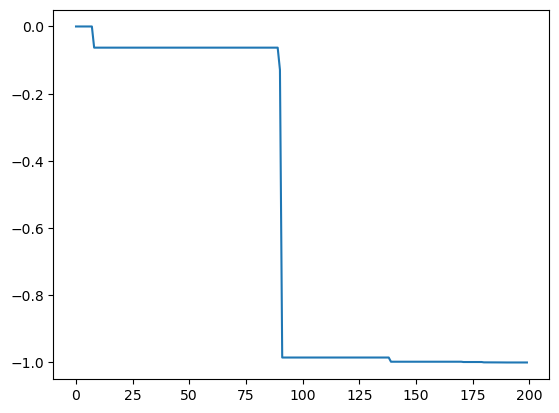

In [24]:
plt.plot(ho.gbest_y_hist)
plt.show()

In [25]:
opts.append(PSO_GA(example_funcs.easom, n_dim=2, config=best_config))
ho = opts[1]
ho.record_mode = True
ho.run()

print('best_x is ', ho.gbest_x, 'best_y is', ho.gbest_y)

best_x is  [3.1385588  3.14343799] best_y is [-0.99998109]


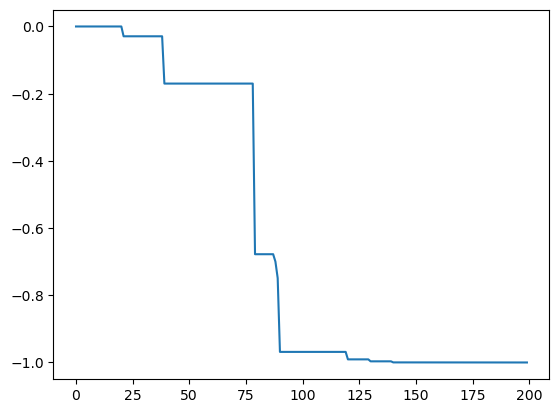

In [26]:
plt.plot(ho.gbest_y_hist)
plt.show()

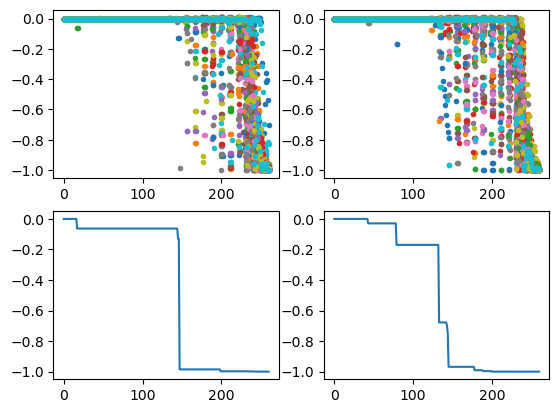

In [27]:
import pandas as pd

Y_history = []
fig, ax = plt.subplots(2, len(opts))
for i, opt in enumerate(opts):
    Y_history = pd.DataFrame(np.array(opt.record_value['Y']).reshape((-1, opt.size_pop)))
    ax[0,i].plot(Y_history.index, Y_history.values, '.')
    Y_history.min(axis=1).cummin().plot(kind='line', ax=ax[1,i])
plt.show()

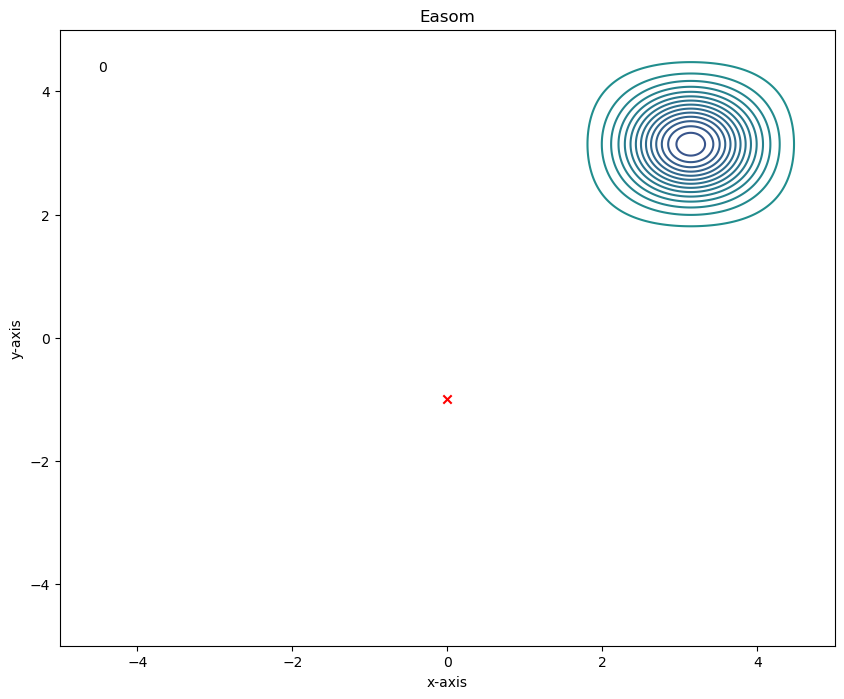

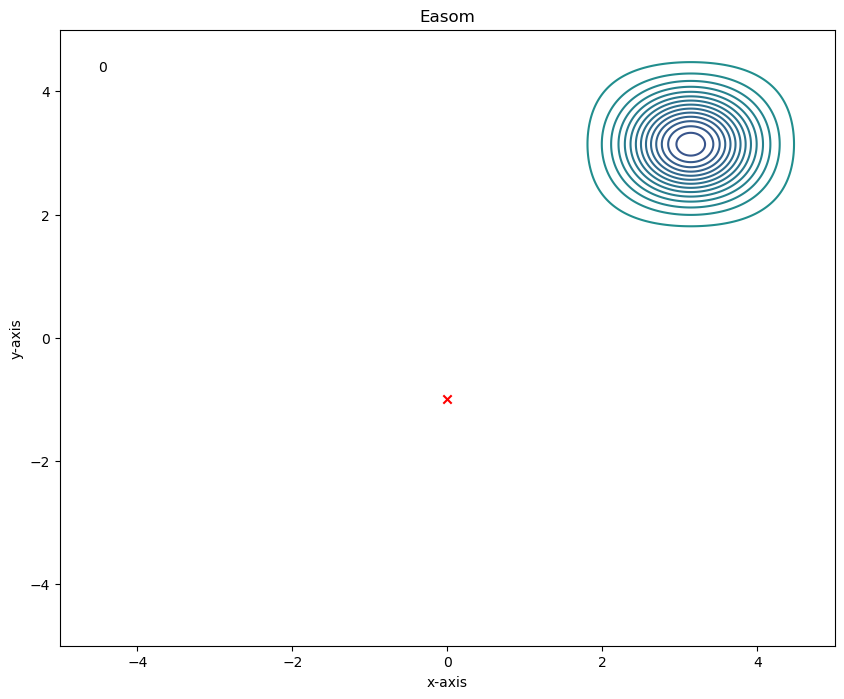

In [28]:
for i, opt in enumerate(opts):
    animation2D = plot_contour(pos_history=ho.record_value['X'], mesher=m, designer=d, mark=(0, -1, 0), title='Easom')
    animation2D.save('easom_'+str(i)+'.gif', writer='ffmpeg', fps=20)

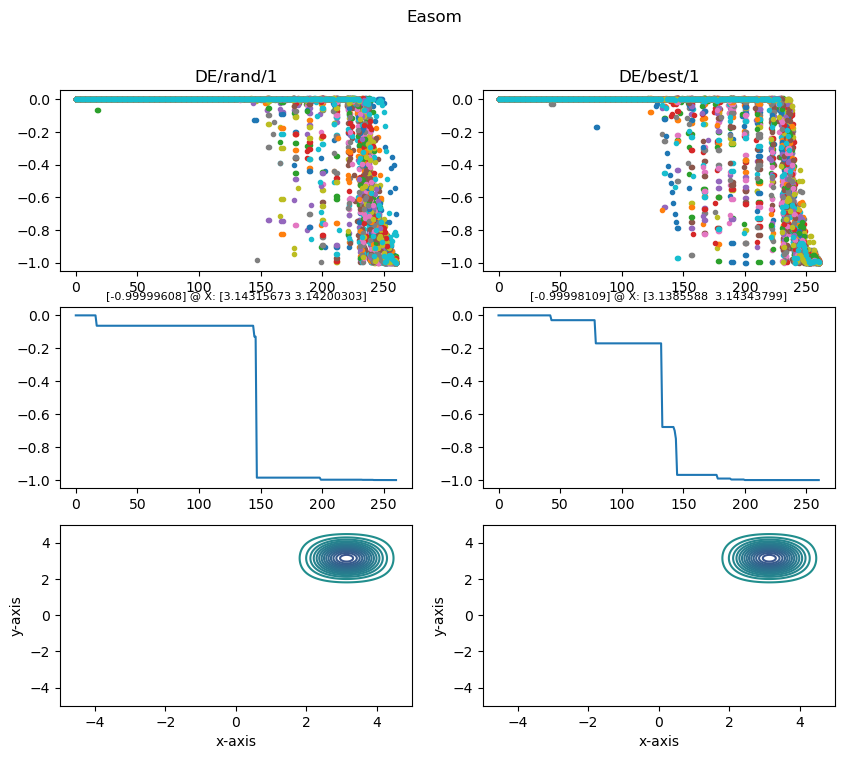

In [29]:
ani_summary = plot_summary(optimizers=opts, title="Easom", titles=[opt.mutation_strategy for opt in opts], mesher=m, designer=d)
plt.show()


In [30]:
ani_summary.save('easom_summary.gif', writer='ffmpeg', fps=15)
Image(url='easom_summary.gif')

In [31]:
pos_history_3d = m.compute_history_3d(opts[0].record_value['X']) #preprocessing
print(str(pos_history_3d))

[[[ 9.50638359e+01  9.16518663e+01  0.00000000e+00]
  [ 4.69467480e+01  6.38995953e+01  0.00000000e+00]
  [-1.62901261e+01 -6.66290310e+01 -0.00000000e+00]
  ...
  [ 1.25486815e+01  1.14915462e+01 -9.23665463e-70]
  [ 7.00765090e+01 -4.75449918e+01  0.00000000e+00]
  [ 8.97077980e+01  1.06878777e+00  0.00000000e+00]]

 [[ 8.80379429e+01  8.73936348e+01 -0.00000000e+00]
  [ 6.55124322e+01 -9.26215173e+01 -0.00000000e+00]
  [ 8.49119313e+01 -1.16668619e+01  0.00000000e+00]
  ...
  [-9.64217491e+01  2.16150355e+01 -0.00000000e+00]
  [-7.59236050e+01  3.34466684e+01  0.00000000e+00]
  [ 2.18874468e+00  5.58937019e+01  0.00000000e+00]]

 [[ 8.80379429e+01  8.73936348e+01 -0.00000000e+00]
  [ 6.55124322e+01 -9.26215173e+01 -0.00000000e+00]
  [ 8.49119313e+01 -1.16668619e+01  0.00000000e+00]
  ...
  [-9.64217491e+01  2.16150355e+01 -0.00000000e+00]
  [-7.59236050e+01  3.34466684e+01  0.00000000e+00]
  [ 2.18874468e+00  5.58937019e+01  0.00000000e+00]]

 ...

 [[ 3.15652297e+00  3.14860421e+00

In [32]:
%%capture

animation3d = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d, title="Easom Random")


In [33]:
animation3d.save('easom_rand_3d.gif', writer='ffmpeg', fps=15)
Image(url='easom_rand_3d.gif')

In [34]:
pos_history_3d = m.compute_history_3d(opts[1].record_value['X']) #preprocessing
print(str(pos_history_3d))

[[[ 9.50638359e+01  9.16518663e+01  0.00000000e+00]
  [ 4.69467480e+01  6.38995953e+01  0.00000000e+00]
  [-1.62901261e+01 -6.66290310e+01 -0.00000000e+00]
  ...
  [ 1.25486815e+01  1.14915462e+01 -9.23665463e-70]
  [ 7.00765090e+01 -4.75449918e+01  0.00000000e+00]
  [ 8.97077980e+01  1.06878777e+00  0.00000000e+00]]

 [[-3.18662382e+01 -1.69844742e+01  0.00000000e+00]
  [-5.26757238e+00  3.35459506e+01  0.00000000e+00]
  [ 6.64242429e+01  1.41884958e+01 -0.00000000e+00]
  ...
  [-3.44751124e+01  9.71111124e+01 -0.00000000e+00]
  [ 5.16316147e+01  4.86004166e+01  0.00000000e+00]
  [ 4.83665670e+01  8.06224481e+01  0.00000000e+00]]

 [[-3.18662382e+01 -1.69844742e+01  0.00000000e+00]
  [-5.26757238e+00  3.35459506e+01  0.00000000e+00]
  [ 6.64242429e+01  1.41884958e+01 -0.00000000e+00]
  ...
  [-3.44751124e+01  9.71111124e+01 -0.00000000e+00]
  [ 5.16316147e+01  4.86004166e+01  0.00000000e+00]
  [ 4.83665670e+01  8.06224481e+01  0.00000000e+00]]

 ...

 [[ 3.16320747e+00  3.28814041e+00

In [35]:
%%capture

animation3d = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d, title="Easom Best")


In [36]:
animation3d.save('easom_best_3d.gif', writer='ffmpeg', fps=15)
Image(url='easom_best_3d.gif')

In [ ]:
ho = PSO_GA(example_funcs.easom, transform_func=False, n_dim=2, lb=[-100., -100.], ub = [100., 100.], max_iter=1000)
ho.record_mode = True
ho.run()
print('best_x is ', ho.gbest_x, 'best_y is', ho.gbest_y)
plt.plot(ho.gbest_y_hist)
plt.show()

In [ ]:
import pandas as pd

Y_history = pd.DataFrame(np.array(ho.record_value['Y']).reshape((-1, ho.size_pop)))
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

In [ ]:
from plotters import plot_cost_history, plot_contour, plot_surface, Mesher, Designer
#Plot the sphere function's mesh for better plots
m = Mesher(func=example_funcs.easom, limits=[(-5,5), (-5,5)])
#Adjust figure limits
d = Designer(limits=[(-5,5), (-5,5), (-1,0.2)], label=['x-axis', 'y-axis', 'z-axis'])

In [ ]:
%%capture

#Make animation
animation2D = plot_contour(pos_history=ho.record_value['X'], mesher=m, designer=d, mark=(3.1415, 3.1415, -1))

animation2D.save('easom.gif', writer='ffmpeg', fps=20)

In [ ]:
Image(url='easom.gif')

In [ ]:
pos_history_3d = m.compute_history_3d(ho.record_value['X']) #preprocessing
print(str(pos_history_3d))

In [ ]:
%%capture

animation3d = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d, mark=(3.1415, 3.1415, -1))
plt.show()


In [ ]:
animation3d.save('easom_3d.gif', writer='ffmpeg', fps=15)
Image(url='easom_3d.gif')

Styblinski-Tang's  objective function

    -5 to 5 with global minimum of -39.16599*n_dim at (-2.903534,...,-2.903534)'''
    Its coordinates are bounded within :code:`[-5,5]`.

    Best visualized with the full domain and a range of :code:`[-100,250]`

In [ ]:
ho = PSO_GA(example_funcs.styblinski_tang, n_dim=2, lb=[-5., -5.], ub = [5., 5.], max_iter=1000)
ho.record_mode = True
ho.run()
print('best_x is ', ho.gbest_x, 'best_y is', ho.gbest_y)
plt.plot(ho.gbest_y_hist)
plt.show()

In [ ]:
import pandas as pd

Y_history = pd.DataFrame(np.array(ho.record_value['Y']).reshape((-1, ho.size_pop)))
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

In [ ]:
from plotters import plot_cost_history, plot_contour, plot_surface, Mesher, Designer
#Plot the sphere function's mesh for better plots
m = Mesher(func=ho.func, limits=[(-5,5), (-5,5)])
#Adjust figure limits
d = Designer(limits=[(-5,5), (-5,5), (-100,250)], label=['x-axis', 'y-axis', 'z-axis'])

In [ ]:
%%capture

#Make animation
animation2D = plot_contour(pos_history=ho.record_value['X'], mesher=m, designer=d, mark=(-2.903534, -2.903534, -39.16599))

animation2D.save('styblinski_tang.gif', writer='ffmpeg', fps=20)

In [ ]:
Image(url='styblinski_tang.gif')

In [ ]:
pos_history_3d = m.compute_history_3d(ho.record_value['X']) #preprocessing
print(str(pos_history_3d))

In [ ]:
%%capture

animation3d = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d, mark=(-2.903534, -2.903534, -39.16599))
plt.show()


In [ ]:
animation3d.save('styblinski_tang_3d.gif', writer='ffmpeg', fps=15)
Image(url='styblinski_tang_3d.gif')